# PIL és Cairo könyvtárak összehasonlítása

PIL a Python standard könytárak részét képezi, alapvető grafikai munkára alkalmas. PyCairo az eredeti Cairo Python-hoz igazított változata, ami a vektorgrafika lehetőségeit kínálja. Az alábbiakban egy rövid mintakód segítségével mutatjuk be a két könyvtár használata közti alapvető különbségeket. Mindkét könyvtárral megközelítőleg azonos kimenet elérése a cél.

## Egyszerű kép készítése PIL segítségével

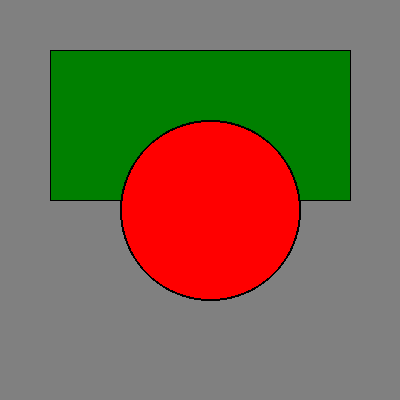

In [2]:
from PIL import Image, ImageDraw

width = 400
height = 400

image = Image.new("RGB", (width, height), color="grey")
draw = ImageDraw.Draw(image)

draw.rectangle((50, 50, 350, 200), fill="green", outline="black")
draw.ellipse((120, 120, 300, 300), fill="red", width=2, outline="black")

display(image)

## Egyszerű kép készítése PyCairo segítségével

A kód jelentősen nagyobb terjedelmű, viszont érdemes észrevenni a kör részletességében mutatkozó különbséget. 

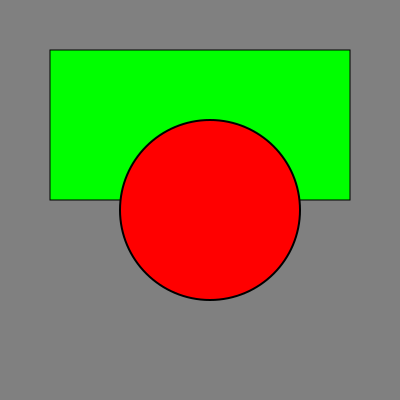

In [3]:
import io
import math
import cairo
from IPython.display import Image, display

width = 400
height = 400

surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
context = cairo.Context(surface)

context.set_source_rgb(0.5, 0.5, 0.5)
context.paint()

context.set_source_rgb(0, 1, 0)
context.rectangle(50, 50, 300, 150)
context.fill_preserve()

context.set_source_rgb(0, 0, 0)
context.set_line_width(1)
context.stroke()

context.set_source_rgb(1, 0, 0)
context.arc(210, 210, 90, 0, 2 * math.pi)
context.fill_preserve()

context.set_source_rgb(0, 0, 0)
context.set_line_width(2)
context.stroke()

buffer = io.BytesIO()
surface.write_to_png(buffer)
buffer.seek(0)

image = Image(buffer.read())
display(image)